<a href="https://colab.research.google.com/github/sandipan1/ML-experiments/blob/master/mnist_experiments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
  !pip install wandb


     |████████████████████████████████| 1.3MB 35.4MB/s 
     |████████████████████████████████| 92kB 25.7MB/s 
     |████████████████████████████████| 81kB 24.3MB/s 
     |████████████████████████████████| 102kB 32.2MB/s 
     |████████████████████████████████| 460kB 42.7MB/s 
     |████████████████████████████████| 235kB 65.4MB/s 
     |████████████████████████████████| 256kB 50.8MB/s 
     |████████████████████████████████| 71kB 28.6MB/s 
     |████████████████████████████████| 184kB 44.6MB/s 
  Created wheel for watchdog: filename=watchdog-0.9.0-cp36-none-any.whl size=73652 sha256=0a3b4f45b84c36ab3e46918b9c0c8b256c2e28ac8298a856917f7a0b7b1a9361
  Stored in directory: /root/.cache/pip/wheels/61/1d/d0/04cfe495619be2095eb8d89a31c42adb4e42b76495bc8f784c
  Created wheel for gql: filename=gql-0.1.0-cp36-none-any.whl size=5541 sha256=fbc5a7e69d58a7a2319ff3f582546e763df4ad0966698961c896d30403eae352
  Stored in directory: /root/.cache/pip/wheels/a7/8d/65/a3247f500d675d80a01e4d2f0ee44fe99f1fa

In [0]:
!wandb login


You can find your API keys in your browser here: https://app.wandb.ai/authorize
Paste an API key from your profile: 

## Single Perceptron 
Classify if a the input image is a 5 or not 

In [0]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.utils import np_utils

import wandb

from wandb.keras import WandbCallback

In [0]:
%%wandb

# logging code
run = wandb.init(project="mnist-singleperceptron")
config = run.config

config.epochs = 10

# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

is_five_train = y_train == 5
is_five_test = y_test == 5
labels = ["Not Five", "Is Five"]

img_width = X_train.shape[1]
img_height = X_train.shape[2]

# create model
model=Sequential()
model.add(Flatten(input_shape=(img_width,img_height)))
model.add(Dense(1,activation='relu'))
model.compile(loss='mse', optimizer='adam',
                metrics=['accuracy'])
#keras outputs the accuracy as algo learns


# Fit the model
model.fit(X_train, is_five_train, epochs=config.epochs, validation_data=(X_test, is_five_test),
                    callbacks=[WandbCallback(labels=labels, data_type="image")])


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 81us/step - loss: 40.2614 - acc: 0.9065 - val_loss: 0.2208 - val_acc: 0.9106
Epoch 2/10
60000/60000 [==============================] - 5s 77us/step - loss: 0.0943 - acc: 0.9096 - val_loss: 0.2008 - val_acc: 0.9107
Epoch 3/10
60000/60000 [==============================] - 5s 77us/step - loss: 0.0904 - acc: 0.9096 - val_loss: 0.1949 - val_acc: 0.9107
Epoch 4/10
60000/60000 [==============================] - 5s 77us/step - loss: 0.0903 - acc: 0.9097 - val_loss: 0.1949 - val_acc: 0.9107
Epoch 5/10
60000/60000 [==============================] - 5s 77us/step - loss: 0.0903 - acc: 0.9097 - val_loss: 0.1949 - val_acc: 0.9107
Epoch 6/10
60000/60000 [==============================] - 5s 77us/step - loss: 0.0903 - acc: 0.9097 - val_loss: 0.1949 - val_acc: 0.9107
Epoch 7/10
60000/60000 [==============================] - 5s 77us/step - loss: 0.0903 - acc: 0.9097 - val_loss: 0.1949 - val_ac

## Classifying digits 
One hot encoding <br> Loss: categorical crossentropy
<br>
Softmax to output probabilites

In [0]:
%%wandb
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.utils import np_utils

import wandb

from wandb.keras import WandbCallback
run = wandb.init(project="mnist-classification")
config = run.config

config.epochs = 10

# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
img_width = X_train.shape[1]
img_height = X_train.shape[2]

#one hot encodings
y_train  = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

labels=list(range(10))
num_classes = y_train.shape[1]

model=Sequential()
model.add(Flatten(input_shape=(img_width,img_height)))
model.add(Dense(num_classes,activation="softmax"))
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test),
                    callbacks=[WandbCallback(labels=labels, data_type="image")])


W0820 22:36:28.214546 139698306963328 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 93us/step - loss: 6.4278 - acc: 0.5965 - val_loss: 4.2401 - val_acc: 0.7344
Epoch 2/10
60000/60000 [==============================] - 5s 89us/step - loss: 4.3687 - acc: 0.7262 - val_loss: 4.2796 - val_acc: 0.7324
Epoch 3/10
60000/60000 [==============================] - 5s 89us/step - loss: 4.3077 - acc: 0.7306 - val_loss: 4.0813 - val_acc: 0.7451
Epoch 4/10
60000/60000 [==============================] - 5s 88us/step - loss: 4.1753 - acc: 0.7392 - val_loss: 4.0987 - val_acc: 0.7441
Epoch 5/10
60000/60000 [==============================] - 5s 88us/step - loss: 4.1645 - acc: 0.7401 - val_loss: 4.1138 - val_acc: 0.7430
Epoch 6/10
60000/60000 [==============================] - 5s 88us/step - loss: 4.1337 - acc: 0.7420 - val_loss: 4.1864 - val_acc: 0.7386
Epoch 7/10
60000/60000 [==============================] - 5s 88us/step - loss: 4.1164 - acc: 0.7432 - val_loss: 4.1327 - val_acc

In [0]:
print(y_test[:10])

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


## Normalizing the data

Lets see if normalizing the data in the range of (0,1) improves accuracy

In [0]:
X_train = X_train.astype("float")
X_test = X_test.astype('float')
X_train = X_train / 255.0
X_test = X_test /255.0    # 255 is the highest value of the pixels


In [0]:
%%wandb
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test),
                    callbacks=[WandbCallback(labels=labels, data_type="image")])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 1920/60000 [..............................] - ETA: 10s - loss: 0.5643 - acc: 0.8490

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.188443). Check your callbacks.
  % delta_t_median)


60000/60000 [==============================] - 6s 93us/step - loss: 0.3827 - acc: 0.9000 - val_loss: 0.3371 - val_acc: 0.9118
Epoch 2/10
60000/60000 [==============================] - 5s 89us/step - loss: 0.3344 - acc: 0.9108 - val_loss: 0.3102 - val_acc: 0.9167
Epoch 3/10
60000/60000 [==============================] - 5s 90us/step - loss: 0.3098 - acc: 0.9170 - val_loss: 0.2935 - val_acc: 0.9196
Epoch 4/10
60000/60000 [==============================] - 5s 89us/step - loss: 0.2913 - acc: 0.9205 - val_loss: 0.2811 - val_acc: 0.9229
Epoch 5/10
60000/60000 [==============================] - 5s 88us/step - loss: 0.2784 - acc: 0.9232 - val_loss: 0.2745 - val_acc: 0.9228
Epoch 6/10
60000/60000 [==============================] - 5s 88us/step - loss: 0.2701 - acc: 0.9244 - val_loss: 0.2670 - val_acc: 0.9265
Epoch 7/10
60000/60000 [==============================] - 5s 88us/step - loss: 0.2640 - acc: 0.9273 - val_loss: 0.2649 - val_acc: 0.9263
Epoch 8/10
60000/60000 [============================

### Normalizing result 
We see that normalizing our data improves the accuracy from 0.65 to 0.92

## Using Hidden layer
Lets see if adding hidden layers improves the network

In [0]:
%%wandb
run = wandb.init(project="mnist-classification",sync_tensorboard=True)
config = run.config
## parameters
config.epochs = 10
config.optimizer ="adam"
config.hidden_nodes = 100

## Create model
model1 = Sequential()
model1.add(Flatten(input_shape=(img_width,img_height)))
model1.add(Dense(config.hidden_nodes,activation ="relu"))
model1.add(Dense(num_classes,activation ="softmax"))
model1.compile(loss="categorical_crossentropy",optimizer=config.optimizer,metrics=["accuracy"])


model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test),
                    callbacks=[WandbCallback(labels=labels, data_type="image")])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 96us/step - loss: 0.2391 - acc: 0.9336 - val_loss: 0.2683 - val_acc: 0.9261
Epoch 2/10
60000/60000 [==============================] - 6s 93us/step - loss: 0.2381 - acc: 0.9342 - val_loss: 0.2718 - val_acc: 0.9261
Epoch 3/10
60000/60000 [==============================] - 6s 93us/step - loss: 0.2381 - acc: 0.9344 - val_loss: 0.2716 - val_acc: 0.9254
Epoch 4/10
60000/60000 [==============================] - 6s 93us/step - loss: 0.2374 - acc: 0.9341 - val_loss: 0.2724 - val_acc: 0.9274
Epoch 5/10
60000/60000 [==============================] - 6s 93us/step - loss: 0.2367 - acc: 0.9344 - val_loss: 0.2680 - val_acc: 0.9275
Epoch 6/10
60000/60000 [==============================] - 5s 92us/step - loss: 0.2358 - acc: 0.9352 - val_loss: 0.2747 - val_acc: 0.9258
Epoch 7/10
60000/60000 [==============================] - 6s 93us/step - loss: 0.2356 - acc: 0.9347 - val_loss: 0.2710 - val_acc

In [0]:
print(X_train[:1])

In [0]:
%%wandb
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.utils import np_utils
from keras.callbacks import Callback
import json

from wandb.keras import WandbCallback
import wandb

run = wandb.init(project="mnist-classification",sync_tensorboard=True)
config = run.config

config.epochs = 10
config.optimizer = "adam"
config.hidden_nodes = 100

# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
img_width = X_train.shape[1]
img_height = X_train.shape[2]

X_train = X_train.astype('float32')
X_train /= 255.
X_test = X_test.astype('float32')
X_test /= 255.

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
labels = range(10)

num_classes = y_train.shape[1]


# create model
model=Sequential()
model.add(Flatten(input_shape=(img_width,img_height)))
model.add(Dropout(0.4))
model.add(Dense(config.hidden_nodes, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=config.optimizer,
                    metrics=['accuracy'])

# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), 
      epochs=config.epochs,
      callbacks=[WandbCallback(data_type="image", labels=labels)])


W0820 23:21:32.813400 139698306963328 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 119us/step - loss: 0.5282 - acc: 0.8353 - val_loss: 0.2073 - val_acc: 0.9420
Epoch 2/10
60000/60000 [==============================] - 7s 111us/step - loss: 0.3250 - acc: 0.9011 - val_loss: 0.1518 - val_acc: 0.9542
Epoch 3/10
60000/60000 [==============================] - 7s 110us/step - loss: 0.2780 - acc: 0.9147 - val_loss: 0.1241 - val_acc: 0.9621
Epoch 4/10
60000/60000 [==============================] - 7s 109us/step - loss: 0.2546 - acc: 0.9211 - val_loss: 0.1163 - val_acc: 0.9650
Epoch 5/10
60000/60000 [==============================] - 7s 110us/step - loss: 0.2413 - acc: 0.9250 - val_loss: 0.1090 - val_acc: 0.9671
Epoch 6/10
60000/60000 [==============================] - 7s 109us/step - loss: 0.2306 - acc: 0.9287 - val_loss: 0.1022 - val_acc: 0.9712
Epoch 7/10
60000/60000 [==============================] - 7s 109us/step - loss: 0.2212 - acc: 0.9304 - val_loss: 0.1020 - 

Dropout prevents the network from overfitting
When training accuracy is better than validation accuracy it means overfitting

In [0]:
ls

 puppy.jpg   sample_data/  'Screenshot from 2019-08-28 13-15-22.png'


## Convolutional Neural network
MLP throws away a lot of data
CNN takes advantages of the spatial structure in images
We can find out about convolution operation and if it helps improve classification.
1. Convolution of a kernel with the image
2. 

In [0]:
%matplotlib inline
from PIL import Image
from matplotlib import pyplot as plt
import numpy
from scipy.signal import convolve2d
import cv2
# from google.colab.patches import cv2_imshow
kernel = [[0.1,0.1,0.1],
          [0.1,0.1,0.1],
          [0.1,0.1,0.1]]

backgroundColor = (0,)*3
pixelSize = 10
imgFile = 'puppy.jpg'
color = True

def drawImage(channel):
  image = Image.open(imgFile)
  red, green, blue = image.split()
  if channel == 'grey':
    image = Image.open(imgFile).convert('LA')
  elif channel == 'r':
    image = red
  elif channel == 'g':
    image = green
  elif channel == 'b':
    image = blue


  image = image.resize((image.size[0]//pixelSize, image.size[1]//pixelSize), Image.NEAREST)
  image = image.resize((image.size[0]*pixelSize, image.size[1]*pixelSize), Image.NEAREST)
  image = image.convert('RGB')
  pixel = image.load()

  
  for i in range(0,image.size[0],pixelSize):
    for j in range(0,image.size[1],pixelSize):
      for r in range(pixelSize):
        pixel[i+r,j] = backgroundColor
        pixel[i,j+r] = backgroundColor

        
  return image

def drawImageConv(kernel, x, y):
  image = Image.open(imgFile)
  image = image.resize((image.size[0]//pixelSize, image.size[1]//pixelSize), Image.NEAREST)

  new_image = convolve2d(numpy.asarray(image)[:,:,0], kernel)
  new_image = new_image.clip(0.0, 255.0)
  for i in range(new_image.shape[0]):
    for j in range(new_image.shape[1]):
      if (i>y or (i==y and j>=x)):
        new_image[i,j] = 0

  
  image = Image.fromarray(new_image)
  image = image.convert('RGB')
  image = image.resize((image.size[0]*pixelSize, image.size[1]*pixelSize), Image.NEAREST)
  pixel = image.load()

  
  for i in range(0,image.size[0],pixelSize):
    for j in range(0,image.size[1],pixelSize):
      for r in range(pixelSize):
        pixel[i+r,j] = backgroundColor
        pixel[i,j+r] = backgroundColor

    
  return image

def showImage(x,y):
  if color:
    imageR= drawImage('r')
    imageG= drawImage('g')
    imageB= drawImage('b')
    opencvImageR = cv2.cvtColor(numpy.array(imageR), cv2.COLOR_RGB2BGR)
    opencvImageG = cv2.cvtColor(numpy.array(imageG), cv2.COLOR_RGB2BGR)
    opencvImageB = cv2.cvtColor(numpy.array(imageB), cv2.COLOR_RGB2BGR)
    
    convImage = drawImageConv(kernel, x, y)
    opencvConvImage = cv2.cvtColor(numpy.array(convImage), cv2.COLOR_RGB2BGR)

    cv2.rectangle(opencvImageR, (x*pixelSize,y*pixelSize), ((x+w)*pixelSize,(y+h)*pixelSize), (0,0,255))
    cv2.rectangle(opencvImageG, (x*pixelSize,y*pixelSize), ((x+w)*pixelSize,(y+h)*pixelSize), (0,0,255))
    cv2.rectangle(opencvImageB, (x*pixelSize,y*pixelSize), ((x+w)*pixelSize,(y+h)*pixelSize), (0,0,255))
    plt.imshow('image red', opencvImageR)
    plt.imshow('image green', opencvImageG)
    plt.imshow('image blue', opencvImageB)
    plt.imshow('image out', opencvConvImage)
  else:
    image= drawImage('grey')
    opencvImage = cv2.cvtColor(numpy.array(image), cv2.COLOR_RGB2BGR)
    
    convImage = drawImageConv(kernel, x, y)
    opencvConvImage = cv2.cvtColor(numpy.array(convImage), cv2.COLOR_RGB2BGR)

    cv2.rectangle(opencvImage, (x*pixelSize,y*pixelSize), ((x+w)*pixelSize,(y+h)*pixelSize), (0,0,255))
    plt.imshow('image', opencvImage)
    plt.imshow('image conv', opencvConvImage)




x = 0
w = 3
h = 3
y = 0




while(True):

  k = cv2.waitKey(0)
  if k == 27:         # wait for ESC key to exit
    cv2.destroyAllWindows()
    break
  elif k == 32:
    showImage(100, 100)
  else:
    showImage(x,y)
    x+=1
    if (x > 32):
      x = 0
      y += 1
    




(640, 506)


TypeError: ignored

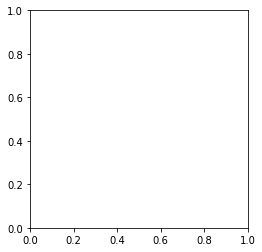

In [0]:
%matplotlib inline
from matplotlib import pyplot as plt
import cv2
from PIL import Image
import numpy as np
from scipy.signal import convolve2d
img = cv2.imread('puppy.jpg')

b,g,r = (img[:,:,i] for i in range(3))
# plt.imshow(b)
# plt.show()
kernel = [[0.1,0.1,0.1],
          [0.1,0.1,0.1],
          [0.1,0.1,0.1]]

# print(a.shape)
gray= cv2.cvtColor(np.array(img), cv2.COLOR_BGR2GRAY)
# pix = gray.resize((gray.shape[0],gray.shape[1]),cv2.INTER_CUBIC)
print(gray.shape)
plt.figure("grau")
plt.imshow(pix)

In [0]:

for ima in a:
    plt.figure()
    plt.imshow(ima)

In [0]:
%matplotlib inline
from matplotlib import pyplot as plt
from PIL import Image
import numpy
from scipy.signal import convolve2d
import cv2

kernel = [[0.1,0.1,0.1],
          [0.1,0.1,0.1],
          [0.1,0.1,0.1]]

imgfile = 'puppy.jpg'
pixelSize = 10
def drawImage(channel=None):
  img = Image.open(imgfile)
  red,green,blue =  img.split()
  if channel=='grey':
    img = Image.open(imgfile).convert('LA')
  elif channel == 'red':
    img =  red
  elif channel == 'green':
    img= green
  elif channel == 'blue':
    img= blue
  elif channel == 'None':
    pass

  image = img.resize((img.size[0]//pixelSize, img.size[1]//pixelSize), Image.NEAREST)
  print(image.size)
#   image =  img.convert('LA')
  plt.imshow(image)
  print(image.size)
  
drawImage('red')


FileNotFoundError: ignored

(506, 640)


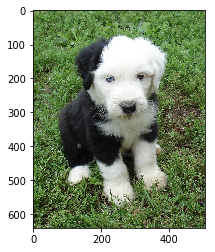

In [0]:
%matplotlib inline
im = Image.open(imgfile)
print(im.size)
plt.imshow(im)


## Building a Convolutional neural network

See all experiment visualization and log at 

https://app.wandb.ai/h-sandipan05/cnn-mnist-classification?workspace=user-h-sandipan05





In [0]:
!wandb login

You can find your API keys in your browser here: https://app.wandb.ai/authorize
Paste an API key from your profile: a94f6a1def208315550f8c5f4d32f6a31dbf140a
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
Successfully logged in to Weights & Biases!


In [0]:

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten
from keras.utils import np_utils
from wandb.keras import WandbCallback
import wandb

run = wandb.init(project="cnn-mnist-classification",sync_tensorboard=True)
config = run.config
config.img_width = 28
config.img_height = 28
config.first_layer_conv_width = 3
config.first_layer_conv_height = 3
config.dense_layer_size = 100
config.epochs = 10

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.astype('float32')
X_train /= 255.
X_test = X_test.astype('float32')
X_test /= 255.

#adding extra dimension and we dont have color dimension
#reshape input data
X_train = X_train.reshape(X_train.shape[0], config.img_width, config.img_height, 1)
X_test = X_test.reshape(X_test.shape[0], config.img_width, config.img_height, 1)

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]
labels=range(10)

# build model
model = Sequential()
model.add(Conv2D(32,
    (config.first_layer_conv_width, config.first_layer_conv_height),
    input_shape=(28, 28,1),
    activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(config.dense_layer_size, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam',
                metrics=['accuracy'])

model.summary()


print("training data", X_train.shape[0])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 100)               540900    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1010      
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
_________________________________________________________________
training data 60000


In [0]:
%%wandb
model.fit(X_train, y_train, validation_data=(X_test, y_test),
        epochs=config.epochs,
        callbacks=[WandbCallback(data_type="image")])

W0831 12:46:21.193512 140616434214784 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0831 12:46:21.244383 140616434214784 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:1033: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 15s 257us/step - loss: 0.1522 - acc: 0.9542 - val_loss: 0.0614 - val_acc: 0.9801


wandb: WARNING wandb.log called without a step keyword argument.  Pass the same step that tensorboard is using to avoid data loss see:
wandb: WARNING https://docs.wandb.com/docs/integrations/tensorboard.html#custom-metrics


Epoch 2/10
60000/60000 [==============================] - 8s 129us/step - loss: 0.0534 - acc: 0.9837 - val_loss: 0.0478 - val_acc: 0.9845
Epoch 3/10
60000/60000 [==============================] - 8s 127us/step - loss: 0.0348 - acc: 0.9887 - val_loss: 0.0503 - val_acc: 0.9831
Epoch 4/10
60000/60000 [==============================] - 8s 126us/step - loss: 0.0231 - acc: 0.9927 - val_loss: 0.0442 - val_acc: 0.9860
Epoch 5/10
60000/60000 [==============================] - 8s 127us/step - loss: 0.0162 - acc: 0.9950 - val_loss: 0.0388 - val_acc: 0.9886
Epoch 6/10
60000/60000 [==============================] - 8s 126us/step - loss: 0.0105 - acc: 0.9967 - val_loss: 0.0401 - val_acc: 0.9881
Epoch 7/10
60000/60000 [==============================] - 8s 129us/step - loss: 0.0088 - acc: 0.9970 - val_loss: 0.0485 - val_acc: 0.9861
Epoch 8/10
60000/60000 [==============================] - 8s 126us/step - loss: 0.0067 - acc: 0.9980 - val_loss: 0.0543 - val_acc: 0.9853
Epoch 9/10
60000/60000 [==========

See detailed visualization at 

### lets try adding droupout

We have 60000 training data and 542,230 trainable parameters . Dropout will help to reduce overfitting 


Visualization at [this](https://app.wandb.ai/h-sandipan05/cnn-mnist-classification/runs/kpf0q1u9?workspace=user-h-sandipan05)

In [0]:
# build model with dropout

run = wandb.init(project="cnn-mnist-classification",sync_tensorboard=True)
config = run.config
config.img_width = 28
config.img_height = 28
config.first_layer_conv_width = 3
config.first_layer_conv_height = 3
config.dense_layer_size = 100
config.epochs = 10
model = Sequential()
model.add(Conv2D(32,
    (config.first_layer_conv_width, config.first_layer_conv_height),
    input_shape=(28, 28,1),
    activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(config.dense_layer_size, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam',
                metrics=['accuracy'])

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 5408)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 100)               540900    
_________________________________________________________________
dropout_4 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 10)               

In [0]:
## lets train now 
%%wandb

model.fit(X_train, y_train, validation_data=(X_test, y_test),
        epochs=config.epochs,
        callbacks=[WandbCallback(data_type="image")])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 1120/60000 [..............................] - ETA: 1:05 - loss: 1.5575 - acc: 0.5009

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.567686). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.284497). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


60000/60000 [==============================] - 10s 161us/step - loss: 0.2641 - acc: 0.9193 - val_loss: 0.0786 - val_acc: 0.9749
Epoch 2/10
60000/60000 [==============================] - 9s 142us/step - loss: 0.1229 - acc: 0.9627 - val_loss: 0.0582 - val_acc: 0.9823
Epoch 3/10
60000/60000 [==============================] - 9s 142us/step - loss: 0.0957 - acc: 0.9704 - val_loss: 0.0478 - val_acc: 0.9844
Epoch 4/10
60000/60000 [==============================] - 8s 141us/step - loss: 0.0810 - acc: 0.9751 - val_loss: 0.0423 - val_acc: 0.9857
Epoch 5/10
60000/60000 [==============================] - 8s 140us/step - loss: 0.0683 - acc: 0.9782 - val_loss: 0.0453 - val_acc: 0.9861
Epoch 6/10
60000/60000 [==============================] - 8s 141us/step - loss: 0.0610 - acc: 0.9801 - val_loss: 0.0416 - val_acc: 0.9858
Epoch 7/10
60000/60000 [==============================] - 8s 141us/step - loss: 0.0565 - acc: 0.9822 - val_loss: 0.0437 - val_acc: 0.9862
Epoch 8/10
60000/60000 [====================

### let add more convolutional layers and see what happens


Detailed Visualizations are here

I am trying out new ways to get loss plot other than wandb. One of the simple tool is livelossplot

In [98]:
!pip install  livelossplot

In [0]:


from livelossplot.keras import PlotLossesCallback


In [91]:
# run = wandb.init(project="cnn-mnist-classification",sync_tensorboard=True)
# config = run.config

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten
from keras.utils import np_utils
# from wandb.keras import WandbCallback
# import wandb

config.img_width = 28
config.img_height = 28
config.first_layer_conv_width = 3
config.first_layer_conv_height = 3

config.dense_layer_size = 100
config.epochs = 10

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.astype('float32')
X_train /= 255.
X_test = X_test.astype('float32')
X_test /= 255.

#adding extra dimension and we dont have color dimension
#reshape input data
X_train = X_train.reshape(X_train.shape[0], config.img_width, config.img_height, 1)
X_test = X_test.reshape(X_test.shape[0], config.img_width, config.img_height, 1)

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]
labels=range(10)

model = Sequential()
model.add(Conv2D(64,
    (config.first_layer_conv_width, config.first_layer_conv_height),
    input_shape=(28, 28,1),
    activation='relu'))   # kernel_size = 3 will also do
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(32,kernel_size = 3,activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(config.dense_layer_size, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam',
                metrics=['accuracy'])

model.summary()


Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 6, 6, 32)          18464     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 2, 2, 32)          0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 128)               0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 100)             

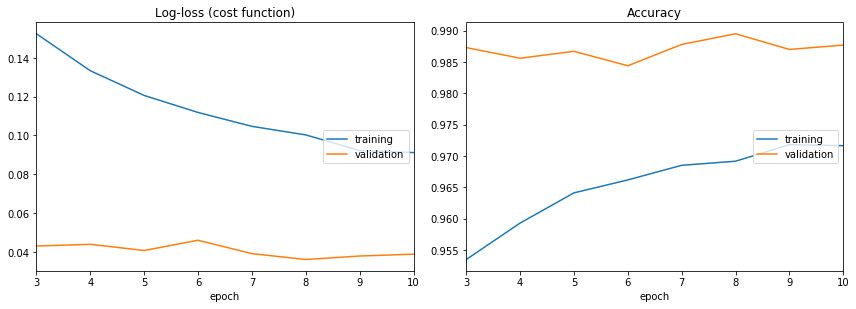

Log-loss (cost function):
training   (min:    0.091, max:    0.489, cur:    0.091)
validation (min:    0.036, max:    0.078, cur:    0.039)

Accuracy:
training   (min:    0.840, max:    0.972, cur:    0.972)
validation (min:    0.977, max:    0.990, cur:    0.988)


In [92]:
plot_loss = PlotLossesCallback()
model.fit(X_train, y_train, validation_data=(X_test, y_test),
        epochs=config.epochs,
        callbacks=[plot_loss])

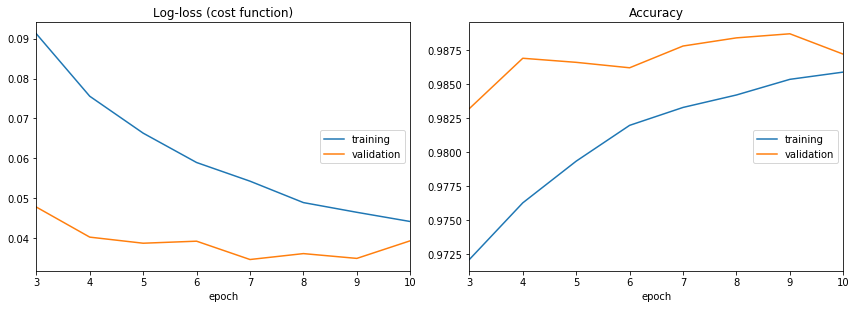

Log-loss (cost function):
training   (min:    0.044, max:    0.251, cur:    0.044)
validation (min:    0.035, max:    0.076, cur:    0.039)

Accuracy:
training   (min:    0.924, max:    0.986, cur:    0.986)
validation (min:    0.977, max:    0.989, cur:    0.987)


In [99]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten
from keras.utils import np_utils
from livelossplot.keras import PlotLossesCallback


config.img_width = 28
config.img_height = 28
config.first_layer_conv_width = 3
config.first_layer_conv_height = 3

config.dense_layer_size = 100
config.epochs = 10

(X_train, y_train), (X_test, y_test) = mnist.load_data()
#normalize
X_train = X_train.astype('float32')
X_train /= 255.
X_test = X_test.astype('float32')
X_test /= 255.

#adding extra dimension and we dont have color dimension
#reshape input data
X_train = X_train.reshape(X_train.shape[0], config.img_width, config.img_height, 1)
X_test = X_test.reshape(X_test.shape[0], config.img_width, config.img_height, 1)

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]
labels=range(10)


## another custom model changging layers
def custom_model():

  model = Sequential()
  model.add(Conv2D(32,
      (config.first_layer_conv_width, config.first_layer_conv_height),
      input_shape=(28, 28,1),
      activation='relu'))   # kernel_size = 3 will also do
#   model.add(MaxPooling2D(pool_size=(2,2)))
#   model.add(Conv2D(32,kernel_size = 3,activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Flatten())
  model.add(Dropout(0.4))
  model.add(Dense(config.dense_layer_size, activation='relu'))
  model.add(Dropout(0.4))
  model.add(Dense(num_classes, activation='softmax'))

  model.compile(loss='categorical_crossentropy', optimizer='adam',
                  metrics=['accuracy'])

  model.summary()
  return model
a= custom_model()
plot_loss= PlotLossesCallback()
a.fit(X_train, y_train, validation_data=(X_test, y_test),
        epochs=config.epochs,
        callbacks=[plot_loss])

I am trying out comet ml . Another library for logging and visualization. However this is not currently working. Feel free to skip it or debug.

In [0]:
from comet_ml import Experiment
import keras
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from keras.preprocessing import image
from keras.optimizers import RMSprop

In [0]:
%%writefile .env
COMET_API_KEY=fgP3nkxhI7VLUqGVOTHKrwF9X

Overwriting .env


In [0]:
from comet_ml import Experiment
import tensorflow

#create an experiment
experiment = Experiment(project_name='mnist')
import keras
batch_size = 128

experiment.log_parameter("batch_size", 128)

ImportError: ignored